# Enlace a un zip de un json

In [49]:
import os
import zipfile

In [50]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip \
    -O /tmp/databasesLoadData.zip

--2024-08-15 16:07:00--  https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.78.59, 142.251.135.187, 142.250.78.123, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.78.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71662510 (68M) [application/zip]
Saving to: ‘/tmp/databasesLoadData.zip’

/tmp/databasesLoadD 100%[===================>]  68.34M  6.15MB/s    in 54s     

2024-08-15 16:07:55 (1.26 MB/s) - ‘/tmp/databasesLoadData.zip’ saved [71662510/71662510]



In [51]:
local_zip = '/tmp/databasesLoadData.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/databasesLoadData')
zip_ref.close()

In [52]:
url = "/tmp/databasesLoadData/sign_mnist_json/data.json"

# Con codecs

In [53]:
import json
import codecs
import requests
import numpy as np
from PIL import Image
from io import BytesIO
%matplotlib inline
import matplotlib.pyplot as plt

In [54]:
data_json = []
with codecs.open(url, 'r', encoding='utf-8') as js:
    for line in js:
        data_json.append(json.loads(line))

In [55]:
images = []

for data in data_json:
  response = requests.get(data['content'])
  img = np.asarray(Image.open(BytesIO(response.content)))
  images.append([img, data["label"]])

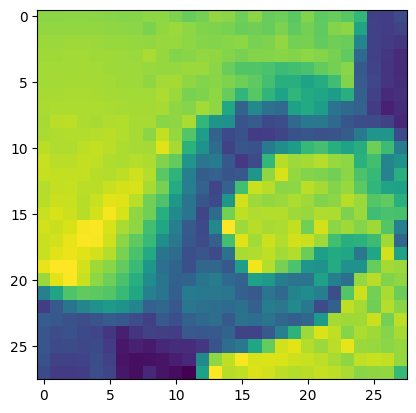

In [56]:
plt.imshow(images[6][0])

# Con base64

In [59]:
import json
import base64
from PIL import Image

url = "/tmp/databasesLoadData/sign_mnist_base64/data.json"
with open(url) as f:
    data = json.load(f)

base64_img_bytes = data["b"].encode("utf-8")
path_img = "/tmp/decoded_image.png"
with open(path_img, "wb") as file_to_save:
    decoded_image_data = base64.decodebytes(base64_img_bytes)  
    file_to_save.write(decoded_image_data)

img = Image.open(path_img)
img

# Con csv

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [63]:
train = pd.read_csv('/tmp/databasesLoadData/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/tmp/databasesLoadData/sign_mnist_test/sign_mnist_test.csv')